# Earth's geomagnetic polarity timescale and the Gamma distribution

Earth’s magnetic field varies with time. The most dramatic aspect of this variation is that it reverses its polarity. The field structure in both the normal and reversed states is dipolar (like a bar magnetic), but the pole locations are switched. The timescale that it takes for the field to reverse is relatively short (a few thousand years) compared to the time that it is typically in a given polarity.

<img src="./images/normal_reversed.png" width = 600>

> Source: Earth’s Dynamic Systems
(10th Edition) Hamblin, W. K. and Christiansen, E. H.


You have now dealt in detail with data that is developed by research vessels towing a 
magnetometer measure the marine magnetic anomalies. As you saw, the history of reversals is recorded by the oceanic crust as it forms at the ridge with both sides of the ridge record this pattern of reversals leading to symmetry about the ridge. Both the marine magnetic anomalies and records of the magnetic field on land in sedimentary rocks and lava flows have led to the development of the geomagnetic polarity time scale (GPTS). 

<img src="./images/GPTS.png" width = 600>

> Source: Gee and Kent (2007) "Source of Oceanic Magnetic Anomalies and the Geomagnetic Polarity Timescale"

## Geomagnetic reversals and the Poisson distribution

Geomagnetic reversals are often interpretted to behave like a Poisson process. Recall from class that a Poisson process meets the following criteria:

- Events are independent of each other.
- The average rate (events per time period) is constant.
- Two events cannot occur at the same time.

In class, we used a Poisson distribution to describe the chance of observing meteors associated with a meteor shower.

## Setup

Run this cell as it is to setup your environment.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 50
import numpy as np
import scipy as sp

from client.api.notebook import Notebook
ok = Notebook('hw06.ok')

Assignment: Out-of-Class 6: Earth's geomagnetic polarity timescale and the Gamma distribution
OK, version v1.17.0



**Import the geomagnetic polarity time scale data for the past 40 million years as a pandas dataframe. (1 point)**

The GPTS.csv file has a start and end date for each polarity zone along with its polarity.

In [2]:
GPTS = pd.read_csv('GPTS.csv')
GPTS.head()

,Start_Myr,End_Myr,Polarity
0,0.780,0.000,normal
1,0.990,0.780,reverse
2,1.070,0.990,normal
3,1.201,1.070,reverse
4,1.211,1.201,normal


Let's use ```plt.fill()``` to make a plot that looks like the geomagnetic polarity time scale that is shown above. To make such a plot, let's make a list of reversal times when the field switched from normal (1) to reverse (-1) and an accompanying time list that we can then plot:

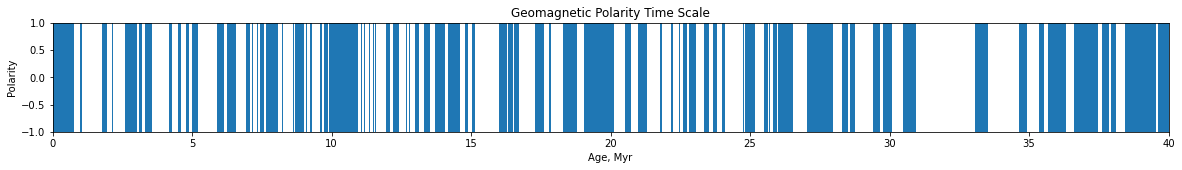

In [3]:
polarity_code = []
time_list = []

for i in GPTS.index:
    if GPTS['Polarity'][i] == 'normal':
        polarity_code.append(-1)
        polarity_code.append(1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
    if GPTS['Polarity'][i] == 'reverse':
        polarity_code.append(1)
        polarity_code.append(-1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
        
plt.figure(1,(20,2))
plt.fill(time_list,polarity_code)
plt.xlabel('Age, Myr')
plt.ylabel('Polarity')
plt.xlim(0,40)
plt.ylim(-1,1)
plt.title('Geomagnetic Polarity Time Scale')
plt.show()

**Calculate the average duration of a geomagnetic polarity zone (4 points).**

To do this you can make a new column named `Zone_dur` in the Dataframe for polarity zone duration where you subtract the start date from the end date.

You can then use ```np.mean()``` to calculate the mean duration, declare a variable named `average_polarity_zone_duration` with the mean polarity duration.

In [4]:
GPTS['Zone_dur']=abs(GPTS['End_Myr']-GPTS['Start_Myr'])
GPTS

,Start_Myr,End_Myr,Polarity,Zone_dur
0,0.780,0.000,normal,0.780
1,0.990,0.780,reverse,0.210
2,1.070,0.990,normal,0.080
3,1.201,1.070,reverse,0.131
4,1.211,1.201,normal,0.010
...,...,...,...,...
155,38.426,38.113,reverse,0.313
156,39.552,38.426,normal,1.126
157,39.631,39.552,reverse,0.079
158,40.130,39.631,normal,0.499


In [5]:
average_polarity_zone_duration = np.mean(GPTS['Zone_dur'])

In [6]:
_ = ok.grade('q1_1') 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**How does the duration of the current normal polarity zone compare to the average duration of a polarity (i.e. time between reversals) over the past 40 million years? (2 points)**

*write your answer here*


**Plot a histogram of the polarity zone duration (1 point)**

This is an empirical distribution (i.e. it is the observed data). When you make the histogram, make sure that `density=True`. Add appropriate labels and a title.

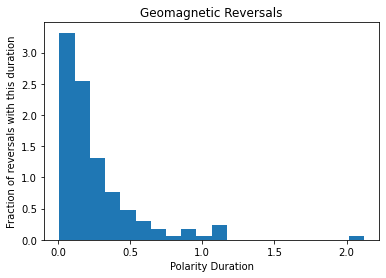

In [7]:
plt.hist(GPTS['Zone_dur'],20,density=True)

plt.xlabel('Polarity Duration') # add labels
plt.ylabel('Fraction of reversals with this duration') 

plt.title('Geomagnetic Reversals')
plt.show()

**What percentile is the polarity zone duration of the current polarity zone? (4 points)**

If a value is the smallest one (shortest duration), it will have a precentile of 0. If it is the largest one (longest duration), it will have a precentile of 100. The median is 50 percentile. If I have 124 values and the value I am calculating the percentile for is the 119th largest one, it has a percentile of 119/124 = 96th percentile.

To determine the percentile, you can sort the data according to polarity zone duration. You can do this by applying the `.sort_values()` function to the Dataframe with the name of your duration column being the input parameter. Also include the parameter `inplace=True` to have it stay sorted. To determine what rank it has you can use the function `.reset_index(inplace=True)` on the dataframe and then find what rank it is which you can then use to calculate the percentile.

Details on percentile can be found in this inferential thinking chapter:
https://www.inferentialthinking.com/chapters/13/1/Percentiles.html

*Note that the percentile function they refer to is np.percentile*

Declare a variable named `percentile_current_zone` with your answer.

In [8]:
GPTS.sort_values(by=['Zone_dur'],inplace=True)
GPTS.reset_index(inplace=True)
print(GPTS.loc[GPTS['index']==0])

     index  Start_Myr  End_Myr Polarity  Zone_dur
150      0       0.78      0.0   normal      0.78


In [9]:
percentile_current_zone=150/159

In [10]:
_ = ok.grade('q1_2') 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Can we describe polarity zone duration with a theoretical distribution?

### Gamma distribution:

In class, we discussed the binomial distribution and the Poisson distribution. Another related distribution is the **Gamma distribution**. The **Gamma distribution** is the probability of a given waiting time between Poisson-distributed events (that is an event that randomly occurs but for which is there is an average time period between the events).

The Gamma distribution gives the probability of a waiting time between Poisson distributed events. For those of you that will appreciate the theoretical basis for this function, here it is below. But you will get a better sense of it by putting it into action:

#### Theoretical

Consider the distribution function $D(x)$ of waiting times until the $h$th Poisson event given a Poisson distribution with a rate of change $\lambda$,

$$ D(x) = P (X \le x) = 1 - P(X > x) = 1-\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}e^{-\lambda x}}{k!} = 1-e^{-\lambda x}\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}}{k!} = 1-\frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$ 

where $\Gamma (x) = (x-1)!$ is a complete gamma function and $\Gamma (n,x) = (n-1)! e^{-x}\sum_{k=0}^{n-1}\frac{x^{k}}{k!}$ an incomplete gamma function. The corresponding probability function $P(x)$ of waiting times until the $h$th Poisson event is then obtained by differentiating  $D(x)$,

$$ P(x) = D'(x) = \frac{\lambda (\lambda x)^{h-1}}{(h-1)!}e^{-\lambda x} $$

Now let $\alpha=h$ (not necessarily an integer) and define $\theta=1/\lambda$ to be the time between changes. Then the above equation can be written

$$ P(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma (\alpha) \theta^{\alpha}} $$

which is the probability of a duration time $x$ between events.

$\theta$ is the expected time between reversals and we will follow McFadden (1984) and define $\theta = \mu / \alpha$ where $\mu$ is the average chron duration. A value for $\alpha$ greater than one can be interpreted either as an artefact linked to some short intervals missing in the GPTS or to some short term memory within the dynamo that would inhibit a second reversal just after a first one has occurred. McFadden (1984) use a value for $\alpha$ of 1.2.

<img src="./images/alpha_greater_one.png" width = 600>

> Source: McFadden (1984) "Statistical Tools for the Analysis of Geomagnetic Reversal Sequence"

In [11]:
from scipy.special import gamma
def gamma_probability(x,mu,alpha):
    """
    This function computes the probability waiting x time between poisson events (wuch as polarity change), 
    given theta the expected time between changes and alpha the shape parameter for the gamma distribution
    
    Parameters
    ----------
    x : the wait time use probability is being investigated
    mu : average polarity zone duration
    alpha : the shape parameter for the gamma distribution (1.2 for the GPTS according to McFadden (1984))
    
    Returns
    -------
    prob : probability of wait time x
    """
    
    theta = mu/alpha
    prob = (x**(alpha - 1) * np.exp(-1*x/theta)) / (gamma(alpha)* theta**alpha)
    
    return prob

**Plot the theoretical gamma probability in comparison to the actual distribution (1 point)**

Use the `gamma_probability()` function and calculate $P$ the probability of observing a polarity zone for each value in a range ```np.arange(0.0,3.0,0.1)```. Then plot the resulting curve on top of the polarity zone duration histogram. Make sure to label the plotted lines, put on a legend and label the axis. Following McFadden (1984), **use an alpha value of 1.2.**

In [12]:
polarity_probability = []
wait= np.arange(0.0,3.0,0.01)

for i in np.arange(0,len(wait)):
    prob = gamma_probability(wait[i],average_polarity_zone_duration,1.2)
    polarity_probability.append(prob)

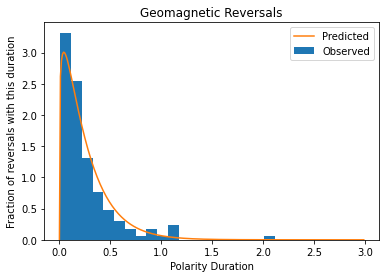

In [13]:
plt.hist(GPTS['Zone_dur'],20,density=True,label='Observed')
plt.plot(wait,polarity_probability,label='Predicted')

plt.xlabel('Polarity Duration') # add labels
plt.ylabel('Fraction of reversals with this duration') 
plt.legend()

plt.title('Geomagnetic Reversals');

#### Empirical and simulated

The observed GPTS gives us one realization of an empirical distribution. We can use the function `np.random.gamma` to simulate additional empirical distributions.

In [14]:
help(np.random.gamma)

Help on built-in function gamma:

gamma(...) method of numpy.random.mtrand.RandomState instance
    gamma(shape, scale=1.0, size=None)
    
    Draw samples from a Gamma distribution.
    
    Samples are drawn from a Gamma distribution with specified parameters,
    `shape` (sometimes designated "k") and `scale` (sometimes designated
    "theta"), where both parameters are > 0.
    
    .. note::
        New code should use the ``gamma`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    shape : float or array_like of floats
        The shape of the gamma distribution. Must be non-negative.
    scale : float or array_like of floats, optional
        The scale of the gamma distribution. Must be non-negative.
        Default is equal to 1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (defa

**Use the `np.random.gamma` function to simulate polarity zones (4 points)**  

`np.random.gamma( )`  has 2 specified parameters: `shape` (sometimes designated "$\alpha$") and `scale` (sometimes designated "$\theta$"), and an optional keyword argument `size` (if `size` is not specified, it returns a single trial). Each call to `np.random.gamma( )` returns a chron duration pulled from the gamma distribution.

So to get random chron lengths use ```np.random.gamma(shape, scale=1.0, size=None)``` where: 

- shape = 1.2 (the alpha we used before)
- scale = average_polarity_zone_duration/1.2
- size = number of polarity zones (so we get random simulated data that is the same length as our original data set)

In [15]:
sim_revs = np.random.gamma(1.2,scale=average_polarity_zone_duration/1.2,size=len(GPTS))

**Plot a histogram of the simulated data, the observed data and the theoretical distribution (1 point)**

They should look pretty similar to each other.

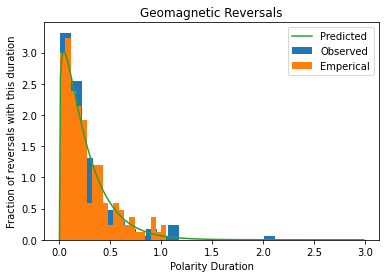

In [16]:
plt.hist(GPTS['Zone_dur'],20,density=True,label='Observed')
plt.hist(sim_revs,20,density=True,label='Emperical')
plt.plot(wait,polarity_probability,label='Predicted')

plt.xlabel('Polarity Duration') # add labels
plt.ylabel('Fraction of reversals with this duration') 
plt.legend()

plt.title('Geomagnetic Reversals');

**Figure out a way to plot your new random polarity time scale like we did for the actual time scale above (2 points)**

In [17]:
d={'Polarity':GPTS.sort_values(by=['index'])['Polarity'],'Zone_dur':sim_revs}
sim_GPTS=pd.DataFrame(data=d)
sim_GPTS['Start_Myr']=np.cumsum(sim_revs)
sim_GPTS['End_Myr']= sim_GPTS['Start_Myr']-sim_GPTS['Zone_dur']
sim_GPTS

,Polarity,Zone_dur,Start_Myr,End_Myr
150,normal,0.949230,0.949230,0.000000
96,reverse,0.401431,1.350660,0.949230
38,normal,0.089242,1.439903,1.350660
62,reverse,0.423079,1.862982,1.439903
1,normal,0.447329,2.310311,1.862982
...,...,...,...,...
118,reverse,0.007581,40.483378,40.475796
157,normal,0.016416,40.499794,40.483378
37,reverse,0.713058,41.212851,40.499794
140,normal,0.203427,41.416278,41.212851


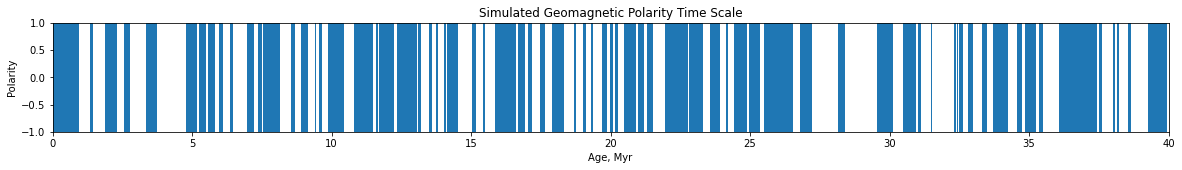

In [18]:
sim_polarity_code = []
sim_time_list = []

for i in sim_GPTS.index:
    if sim_GPTS['Polarity'][i] == 'normal':
        sim_polarity_code.append(-1)
        sim_polarity_code.append(1)
        sim_time_list.append(sim_GPTS['End_Myr'][i])
        sim_time_list.append(sim_GPTS['End_Myr'][i])
    if sim_GPTS['Polarity'][i] == 'reverse':
        sim_polarity_code.append(1)
        sim_polarity_code.append(-1)
        sim_time_list.append(sim_GPTS['End_Myr'][i])
        sim_time_list.append(sim_GPTS['End_Myr'][i])
        
plt.figure(1,(20,2))
plt.fill(sim_time_list,sim_polarity_code)
plt.xlabel('Age, Myr')
plt.ylabel('Polarity')
plt.xlim(0,40)
plt.ylim(-1,1)
plt.title('Simulated Geomagnetic Polarity Time Scale')
plt.show()

### Will the field reverse soon?!
But what we _really_ would like to know is how likely is it that a polarity reversal will happen soon. The current normal chron has been going on for 0.78 Myr. To find the probability that a reversal will happen in the next say 10 thousand years we need to find that probability of a chron that is longer than 0.78 Myr but shorter than 0.79 Myr. 
$$P (0.78 \le X \le 0.79) = P(X \le 0.79) - P(X \le 0.78) = (1 - P(0.79)) - (1 - P(0.78))$$
**Use the ```gamma_probability``` function to do this calculation (4 points). Declare a variable `P_rev_soon` with your answer.**

In [19]:
P_rev_soon = (1-gamma_probability(0.79,average_polarity_zone_duration,1.2))-(1-gamma_probability(0.78,average_polarity_zone_duration,1.2))
P_rev_soon

0.007485773073145352

In [20]:
_ = ok.grade('q1_3') 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Based on this probability, you think the field is about to reverse? (1 point)**

*Write your answer here*

**Export the notebook as .html and upload to bCourses**